In [1]:
import torch
print(torch.tensor([1, 2], [3, 4]))  # 2차원의 텐서 생성
print(torch.tensor([[1, 2], [3, 4]]))
print(torch.tensor([[1, 2], [3, 4]], dtype = torch.float64))

TypeError: tensor() takes 1 positional argument but 2 were given

In [ ]:
temp = torch.tensor([[1, 2], [3, 4]])
print(temp.numpy()) ### 텐서를 ndarray로

temp = torch.tensor([[1, 2], [3, 4]])

텐서의 인덱스 조작

In [2]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7]) ## 파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1]) ## 인덱스로 접근
print('-------------------------')
print(temp[2:5], temp[4:-1]) ####슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
-------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


In [5]:
import pandas as pd
import torch
data = pd.read_csv('/dais03/KDY/Deep_Learning_Study/Study_file/Chapter_2/train.csv')

커스텀 데이터셋을 만들어서 사용

In [6]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self, csv_file):   ### csv 파일을 불러옴
        self.label = pd.read_csv(csv_file)
        
    def __len__(self):   ## 전체 데이터셋의 크기(size) 를 반환합니다.
        return len(self.label)
    
    def __getitem__(self, idx):  ## 전체 x 와 y 데이터 중에 해당 idx번째의 데이터를 가져옵니다.
        sample = torch.tensor(self.label.iloc[idx, 0:3]).int()
        label = torch.tensor(self.label.iloc[idx, 3]).int()
        return sample, label

In [7]:
tensor_dataset = CustomDataset('/dais03/KDY/Deep_Learning_Study/Study_file/Chapter_2/train.csv') # 데이터 셋으로 train.csv 사용
dataset = DataLoader(tensor_dataset, batch_size = 4, shuffle = True) ## 데이터 셋을 torch.utils.data.DataLoader 에 파라미터로 전달합니다.

### Note == torch.utils.data.DataLoader

데이터로더 객체는 학습에 사용될 데이터 전체를 보관했다가 모델 학습을 할 때 배치 크기만큼 데이터를 꺼내서 사용합니다. 이때 주의할 것은 데이터를 미리 잘라 놓는 것이 아니라 내부적으로 반복자에 포함된 인덱스를 이용하여 배치 크기만큼 데이터를 반환한다는 것입니다.

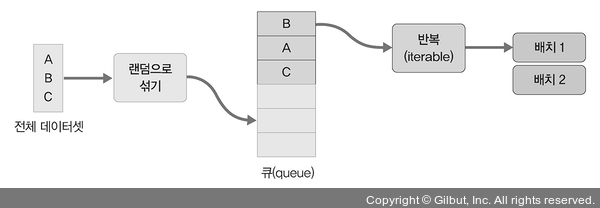

따라서 데이터로더는 다음과 같이 for 문을 이용하여 구문을 반복 실행하는 것과 같습니다.

In [10]:
for i, data in enumerate(dataset, 0):
    print(i, end = '')
    batch = data[0]
    print(batch.size())

ValueError: too many dimensions 'str'

# 파이토치에서 제공하는 데이터셋의 활용

다음은 MNIST 데이터셋을 내려받는 예제입니다.

In [12]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0, 5), (1, 0))
]) ##평균이 0.5, 표준편차가 1.0이 되도록 데이터의 분포(normalize) 를 조정


In [15]:
from torchvision.datasets import MNIST
import requests
download_root = '/dais03/KDY/Deep_Learning_Study/Study_file/Data'  ## 내려받을 경로 지정

train_dataset = MNIST(download_root, transform = mnist_transform, train = True, download = True) ## 훈련 데이터 셋
valid_dataset = MNIST(download_root, transform = mnist_transform, train = False, download = True) ## 검증 데이터 셋
test_dataset = MNIST(download_root, transform = mnist_transform, train = False, download = True) ## 테스트 데이터 셋

100.0%


Extracting /dais03/KDY/Deep_Learning_Study/Study_file/Data/MNIST/raw/train-images-idx3-ubyte.gz to /dais03/KDY/Deep_Learning_Study/Study_file/Data/MNIST/raw



100.0%


Extracting /dais03/KDY/Deep_Learning_Study/Study_file/Data/MNIST/raw/train-labels-idx1-ubyte.gz to /dais03/KDY/Deep_Learning_Study/Study_file/Data/MNIST/raw



100.0%


Extracting /dais03/KDY/Deep_Learning_Study/Study_file/Data/MNIST/raw/t10k-images-idx3-ubyte.gz to /dais03/KDY/Deep_Learning_Study/Study_file/Data/MNIST/raw



100.0%

Extracting /dais03/KDY/Deep_Learning_Study/Study_file/Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /dais03/KDY/Deep_Learning_Study/Study_file/Data/MNIST/raw



# 2.2.3  모델 정의

계층
- 모듈 또는 모듈을 구성하는 한 개의 계츨으로 합성곱층, 선형 게층 등이 있습니다.

모듈
- 한 개 이상의 게층이 모여서 구성된 것으로, 모듈이 모여서 새로운 모듈을 만들수도 있습니다.

모델
- 최종적으로 원하는 네트워크로, 한 개의 모듈이 모델이 될 수도 있습니다.


**결국 계층 < 모듈 < 모델**


## 단순 신경망을 정의 하는 방법

매우 단순한 모델 을 짤 때 `nn` 사용한다

In [17]:
model = nn.Linear(in_features = 1, out_features = 1, bias = True) 

NameError: name 'nn' is not defined

## nn.Module() 을 상속하여 정의하는 방법

파이토치에서 nn.Module 을 상속받는 모델은 기본적으로 __init__()과 forword() 함수를 포함합니다.  
`__init__()` 에서는 모델에서 사용될 모듈(nn.Linear, nn.Conv2d), 활성화 함수등을 정의하고,  
   `forword() `함수에서는 모델에서 실행되어야 하는 연산을 정의합니다

In [22]:
class MLP(nn.Module):
    def __init__(self, inputs):
        super(MLP, self).__init__()
        self.layer = Linear(inputs, 1) ## 계층정의
        self.activation = Sigmoid()  ## 활성화 함수 정의
        
    def forword(self, X):
        X = self.layer(X)
        X = self.activation(X)
        return X

## Sequential 신경망을 정의하는 방법

nn.Sqeuential 을 사용하면 __init__() 에서 사용할 네트워크 모델들을 정의해 줄 뿐만 아니라  
forword() 함수에서는 모델에서 실행되어야 할 계산을 좀 더 가독성이 뛰어나게 코드로 작성할 수 있습니다.   
또한, Sequential 객체는 그 안에 포함된 각 모듈을 순차적으로 실행해주는데 다음과 같이 코드를 작성할 수 있습니다.

In [28]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 5),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 30, kernel_size = 5),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2))
        
        self.layer3 = nn.Sequential(
            nn.Linear(in_features = 30*5*5, out_features = 10, bias = True),
            nn.ReLU(inplace = True))
        
        
        def forword(self, x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0], -1)
            x = self.layer3(x)
            return x

model = MLP() ## 모델에 대한 객체 생성


print("Printing children \n------------------------")
print(list(model.children()))
print("\n\nPrinting Modules \n---------------")
print(list(model.modules()))

Printing children 
------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules 
---------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, 

nn.Sequential 은 모델의 계층이 복잡할수록 효과가 뛰어납니다.

### Note == model.modules() & model.children()

model.modules() 는 모델의 네트워크에 대한 모든 노드를 반환하며, model.children() 은 같은 수준(level) 의 하위 노드를 반환합니다.

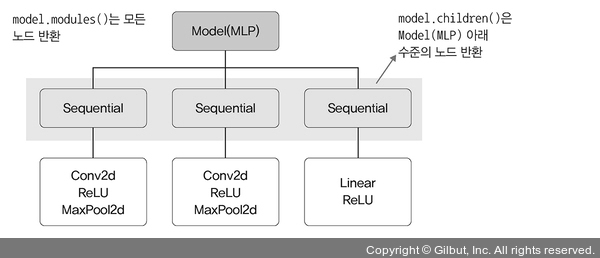

# 함수로 신경망을 정의하는 방법

Sequential 을 이용하는 것과 동일하지만, 함수로 선언할 경우 변수에 저장해놓은 계층들을 재사용할 수 있는 장점이 있습니다.  

하지만 복잡해지는 단점도 있습니다.   

참고로 복잡한 모델의 경우에는 함수를 이용하는 것보다는 nn.Module() 을 상속받아 사용하는 것이 편리합니다.

In [29]:
def MLP(in_features = 1, hidden_features = 20, out_features = 1):
    hidden = nn.Linear(in_features = in_features, out_features = hidden_features, bias = True)
    activation = nn.ReLU()
    output = nn.Linear(in_features = hidden_features, out_features = out_features, bias = True)
    net = nn.Sequential(hidden, activation, output)
    return net


ReLU, Softmax 및 Sigmoid 와 같은 활성화 함수는 모델을 정의할 때 지정합니다.

# 2.2.4 모델의 파라미터 정의

손실함수
- 학습하는 동안 출력과 실제 값 사이의 오차를 측정
    - 즉,  wx + b 를 계산한 값과 실제 값인 y 의 오차를 구해서 모델의 정확성을 측정합니다.   

    - BCELoss
        - 이진 분류
    - CrossEntropyLoss
        - 다중 클래스 분류
    - MSELoss
        - 회귀 모델

옵티마이저
- 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정합니다.

- optimizer
    - step() 메서드를 통해 전달받은 파라미터를 업데이트
- torch.optim.Optimizer(params, defaults)
    - 모든 옵티마이저의 기본이 되는 클래스
- zero_grad()
    - 옵티마이저에 사용된 파라미터들의 기울기를 0으로 만듦
- torch.optim.lr_scheduler
    - 에포크에 따라 학습률 조절

    옵티마이저에 사용되는 종류
    - optim.Adadelta, optim.Adagrad, optim.Adam, optim.SparseAdam, optim.Adamax
    - optim.ASGD, optim.LBFGS
    - optim.RMSProp, optim.Rprop, optim.SGD

    

학습률 스케줄러
- 미리 지정한 횟수의 에포크를 지날 때 마다 학습률을 감소 시켜 줌
- 초기에 빠른 학습을 진행하다가 전역 최소점에 다다르면 학습률을 줄려 최적점에 찾아갈 수 있도록 해줌

    - optim.lr_scheduler.LambdaLR
        - 람다 함수를 이용하여 그 함수의 결과를 학습률로 지정
    - optim.lr_scheduler.StepLR
        - 특정 단계마다 학습률을 감마 비율 만큼 감소
    - optim.lr_scheduler.MultiStepLR
        - StepLR 과 비슷 하지만 특정 단계가 아닌 지정된 에포크에만 감마 비율로 감소
    - optim.lr_scheduler.ExponentialLR
        - 에포크마다 이전 학습률에 감마만큼 곱함
    - optim.lr_scheduler.CosineAnnealingLR
        - 학습률을 코사인 함수의 형태처럼 변화시킴
         - 학습률이 커지기도 작아지기도 함
    - optim.lr_scheduler.ReduceLROnPlateau
        - 학습이 잘되고 있는지 아닌지에 따라 동적으로 학습률을 변화시킴


지표
- 훈련과 테스트 단계를 모니터링함

### Note == 전역 최소와 최적점

지역 최소
- 오차 값(Loss)이 가장 작을 때 
- 최적점 이라 부름

지역 최소
- 전역 최소를 찾아가는 홀 같은 개념
- 여기서 멈추면 `최소값을 갖는 오차를 찾을 수 없는 문제??` 발생

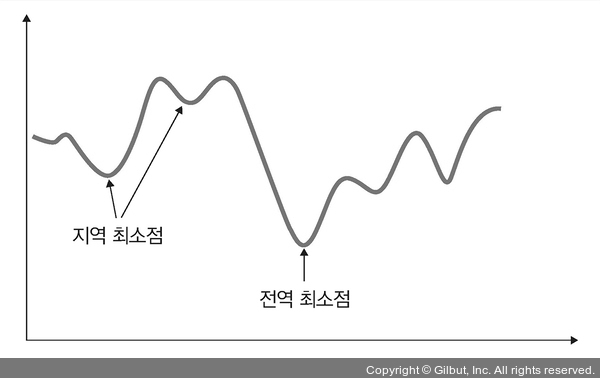

모델의 파라미터를 정의하는 예제 코드

In [32]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum  = 0.9)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer = optimizer, lr_lambda = lambda epoch:0.95 **epoch)
for epoch in range(1, 100+1): ##에포크 수 만큼 데이터를 반복하여 처리
    for x, y in dataloader:  ## 배치 크기만큼 데이터를 가져와서 학습 진행
        optimizer.zero_grad()
loss_fn(model(x), y).backward()
optimizer.step()
scheduler.step()

NameError: name 'dataloader' is not defined

# 2.25 모델 훈련

앞서 만든 데이터로 학습을 시킴  
이때 학습을 시킨다는 것은 y = wx + b 라는 함수에서  w 와 b 의 적절한 값을 찾는다는 의미입니다.  
w 와  b 에 임의의 값을 적용하여 시작하며 오차가 줄어들어 전역 최소점에 이를때 까지 파라미터 (w, b) 를 수정

구체적인 훈련 방법
1. optimizer.zero_grad() 메서드를 활용해 기울기를 초기화
        - 이전 역전파에 의해 기울기가 누적하는 것을 방지하기 위해
2. 기울기를 계산하기 위해 loss.backward() 메서드를 사용
    - 새로운 기울기 값이 이전 기울기 값에 누적되어 계산됨
    - 순환신경망 모델을 짤때는 효과적이나 누적이 필요하지 않으면 사용하지 않음
    - --> 기울기 값 누적 필요없으면, 입력값을 모델에 적용하기 전에 optimizer.zero_grad() 로 기울기 를 초기화 해야함(미분 값이 중첩되므로)
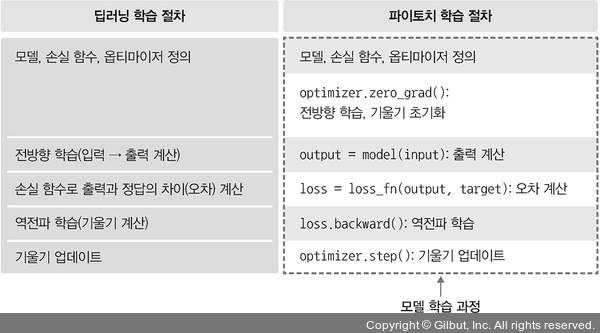

loss.backward() 메서드 사용해 기울기를 자동 계산  

모델을 훈련시키는 예시 코드

In [33]:
for epoch in range(100):
    yhat = model(x_train)
    loss = criterion(yhat, y_train)
    optimizer.zero_grad() ## 오차가 중첩적으로 살이지 않도록 초기화
    loss.backward()
    optimizer.step()

NameError: name 'x_train' is not defined

# 2.2.6 모델 평가

모델을 평가하는 코드

In [34]:
import torch
import torchmetrics

preds = torch.randn(10, 5).softmax(dim = -1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target) # 모델을 평가하기 위한 metrics.funtional.accuracy 사용



TypeError: accuracy() missing 1 required positional argument: 'task'

모듈로 모델을 평가하는 코드

In [35]:
import torch 
import torchmetrics
metric = torchmetrics.Accuracy() # 모델 평가(정확도) 초기화

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim = -1)
    target = torch.randint(5, (10, ))
    
    
    acc = metric(preds, target)
    print(f"Accuracy on batch {i}: {acc}") # 현재 배치에서 모델 평가(정확도)
    
    
acc = metric.compute()
print(f"Accuracy on all data: {acc}") # 모든 배치에서 모델 평가(정확도)



TypeError: __new__() missing 1 required positional argument: 'task'

혹은 사이킷런의 confusion_matrix를 사용할 수도 있다  
confusion_matrix, accuracy_score 와 classification_report 클래스를 이용하면 쉽게 정확도(accuracy) 를 찾음

# 2.2.7 훈련 과정 모니터링

파이토치로 머신러닝 / 딥러닝 모델을 만들어서 학습해 보면 학습이 진행되는 과정에서 각 파라미터 에 어떤 값들이 어떻게 변화하는지 모니터링하기 어렵습니다.   
이때 텐서보드를 이용해 학습에 사용되는 각종 파라미터 값이 어떻게 변화하는지 손쉽게 시각화하여 살펴 볼수 있으며 성능을 추적하거나 평가하는 용도로도 사용할 수 있습니다.  

텐서보드를 사용하는 방법
1. 텐서보드 설정
2. 텐서보드에 기록
3. 텐서보드를 사용하여 모델 구조 조사

In [37]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('/dais03/KDY/Deep_Learning_Study/Study_file/Chapter_2') # 모니터링에 필요한 값들이 저장 될 위치

for epoch in range(num_epochs):
    model.train()    # 학습 모드로 전환(dropout = True)
    batch_loss = 0.0    
    
    for i, (x, y) in enumerate(dataloader):
        x, y = x.to(device).float(), y.to(device).float()
        outputs = model(x)
        loss = criterion(outputs, y)
        writer.add_scaler("Loss", loss, epoch) # 스칼라 값(오차) 를 기록
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
writer.close() # SummaryWriter 가 더 이상 필요하지 않으면 close() 메서드 출력

NameError: name 'num_epochs' is not defined

### Note == model.train() & model.eval()

model.train() 
- 훈련 데이터셋에 사용하여 모델 훈련이 진행될 것임을 알립니다. 
- 드롭 아웃이 활성화됨

model.eval()
- 모델을 평가할 때는 모든 노드를 사용하겠다는 의미로 검증과 테스트 데이터 셋에 사용함

model.train() 과 model.eval() 을 선언해야 모델의 정확도를 높일 수 있음  


model.eval()

In [38]:

model.eval() # 검증 모드로 전환(dropout = False)
with torch.no_grad(): ## 1
    valid_loss = 0
    
    
    for x, y in valid_dataloader:
        outputs = model(x)
        loss = F.cross_entropy(outputs, y.long().squeeze())
        valid_loss += float(loss)
        y_hat += [outputs]
        
valid_loss = valid_loss / len(valid_loader)

NameError: name 'valid_dataloader' is not defined

1. model.eval() 에서 with torch.no_guad()를 사용하는 이유는 다음과 같습니다. 

파이토치는 모든 연산과 기울기 값을 저장합니다.  
하지만 검증(혹은 테스트) 과정에서는 역전파가 필요하지 않기 때문에 with torch.no_guad() 를 이용하여 기울기 값을 저장하지 않도록 합니다.   
이는 연산시간을 줄일 수 있습니다.  

# 2.3 실습 환경 설정

# 2.4 파이토치 코드 맛보기

car_evaluation.csv 파일 사용  

7개의 칼럼
- price
- maint(유지 비용)
- doors
- persons(수용 인원)
- lug_capacity(수화물 용량)
- safty
- output(차 상태)
    - 이 데이터는 unacc(허용 불가능한 수준), 및, acc(허용 가능한 수준), 양호(good), 및 매우 좋은 (very good, vgood) 중 하나의 값을 가집니다

### Note. 라이브러리 
matplotlib
- 시각화 라이브러리
- 2d, 3d plot(그래프) 를 그릴때 사용

seaborn
- 시각화 라이브러리
- 다양한 통계 지표 나타내는 라이브러리 제공

scikit-learn
- 분류, 회귀, 군집, 의사 결정 트리 등 제공하는 
- 머신러닝 라이브러리

In [39]:
# 1. 필요한 라이브러리 호출

import torch
import torch.nn as nn
import numpy as np # 벡터 및 행렬 연산에서 매우 편리한 기능을 제공하는 파이썬 라이브러리 패키지
import pandas as pd # 데이터 처리를 위한 라이브러리 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline    
#그래프가 ipynb 파일 안에 저장

In [40]:
# 2.2 데이터 호출

dataset = pd.read_csv('/dais03/KDY/Deep_Learning_Study/Data/Chapter2/car_evaluation.csv') # 1
dataset.head() # 2 

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


1. 데이터 프레임 호출

2. 데이터의 내용 확인  
처음의 5줄을 확인  

유사한 방법으로는 dataset.tail() 로 뒤에서 n 줄을 출력

데이터가 단어와 숫자로 구성됨을 확인  

컴퓨터는 단어를 인식할 수 없기에   단어를 벡터화하는 임베딩 작업 필요   

<AxesSubplot:ylabel='output'>

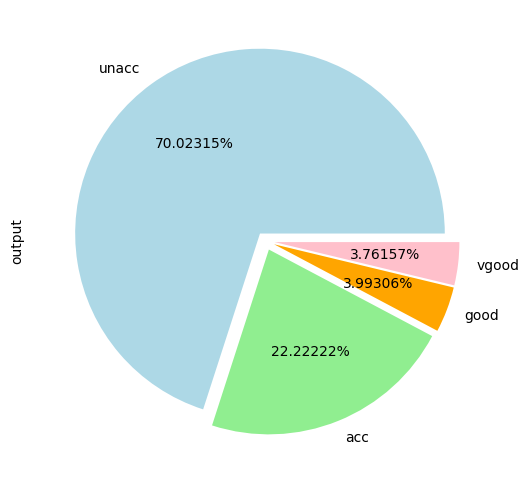

In [43]:
# 2.3 예제 데이터셋 분포  
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8  
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind = 'pie', autopct = '%0.05f%%', colors = ['lightblue', 'lightgreen', 'orange', 'pink'], explode = (0.05, 0.05, 0.05, 0.05))

- 자동차의 70% 는 허용 불가능한 상태에 있고 
- 20% 만 허용 가능한 수준  

--> 즉, 양호한 상태의 자동차의 비율이 현저히 낮다. 

전처리 
- 딥러닝은 모두 통계 알고리즘을 기반으로 하기에 텐서로 전환해야 한다. 
- 데이터들이 범주형이기에 단어를 배열로 바꾸는 방법을 살핌

astype()
- 범주형 데이터를 범주형 타입으로 변환


또한 바꾸어진 범주형 타입을 텐서로 변환해야 한다. 

In [45]:
# 2.4 데이터를 범주형 타입으로 변환  
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety'] # 칼람 목록

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category') # astype 메서드로 데이터를 범주형으로 변환
    
price = dataset['price'].cat.codes.values # 1. 
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1) # 2. 

categorical_data[:10] # 합친 넘파이 배열 중 열 개의 행을 출력하여 보여줌

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

1. 범주형 데이터를 텐서로 전환하는 절차

범주형 데이터 --> dataset[category] --> 넘파이 배열 --> 텐서

범주형 데이터를 넘파이 배열로 바꾸기 위해 cat.codes 를 사용  
catcodes 는 어떤 클래스가 어떤 숫자로 매핑되어 있는지 확인이 어려운 단점이 읶음

2. np.stack 은 두 개 이상의 넘파이 객체를 합칠 때 사용